In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az


In [2]:
az.style.use('arviz-darkgrid')
%matplotlib inline


In [3]:

np.random.seed(123)
theta_real = 0.35 # unknown value in a real experiment
trial_counts = [10,100,1000]

10


Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [θ]


Sampling 2 chains, 0 divergences:   0%|          | 0/3000 [00:00<?, ?draws/s]

Sampling 2 chains, 0 divergences:   4%|▍         | 134/3000 [00:00<00:02, 1335.61draws/s]

Sampling 2 chains, 0 divergences:  10%|█         | 302/3000 [00:00<00:01, 1422.55draws/s]

Sampling 2 chains, 0 divergences:  16%|█▌        | 484/3000 [00:00<00:01, 1521.39draws/s]

Sampling 2 chains, 0 divergences:  22%|██▏       | 669/3000 [00:00<00:01, 1605.94draws/s]

Sampling 2 chains, 0 divergences:  29%|██▉       | 863/3000 [00:00<00:01, 1692.62draws/s]

Sampling 2 chains, 0 divergences:  35%|███▍      | 1049/3000 [00:00<00:01, 1732.87draws/s]

Sampling 2 chains, 0 divergences:  42%|████▏     | 1246/3000 [00:00<00:00, 1797.00draws/s]

Sampling 2 chains, 0 divergences:  48%|████▊     | 1445/3000 [00:00<00:00, 1849.53draws/s]

Sampling 2 chains, 0 divergences:  55%|█████▍    | 1649/3000 [00:00<00:00, 1899.45draws/s]

Sampling 2 chains, 0 divergences:  62%|██████▏   | 1850/3000 [00:01<00:00, 1930.02draws/s]

Sampling 2 chains, 0 divergences:  68%|██████▊   | 2045/3000 [00:01<00:00, 1934.66draws/s]

Sampling 2 chains, 0 divergences:  75%|███████▍  | 2244/3000 [00:01<00:00, 1950.68draws/s]

Sampling 2 chains, 0 divergences:  81%|████████▏ | 2438/3000 [00:01<00:00, 1928.66draws/s]

Sampling 2 chains, 0 divergences:  88%|████████▊ | 2636/3000 [00:01<00:00, 1942.10draws/s]

Sampling 2 chains, 0 divergences:  95%|█████████▍| 2837/3000 [00:01<00:00, 1960.12draws/s]

Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 1835.56draws/s]

    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.327  0.125   0.101    0.564      0.004    0.003     788.0   788.0   

   ess_bulk  ess_tail  r_hat  
θ     789.0    1122.0    1.0  


100


Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [θ]


Sampling 2 chains, 0 divergences:   0%|          | 0/3000 [00:00<?, ?draws/s]

Sampling 2 chains, 0 divergences:   5%|▍         | 146/3000 [00:00<00:01, 1454.58draws/s]

Sampling 2 chains, 0 divergences:  11%|█         | 325/3000 [00:00<00:01, 1541.05draws/s]

Sampling 2 chains, 0 divergences:  17%|█▋        | 502/3000 [00:00<00:01, 1602.62draws/s]

Sampling 2 chains, 0 divergences:  23%|██▎       | 681/3000 [00:00<00:01, 1652.50draws/s]

Sampling 2 chains, 0 divergences:  29%|██▊       | 858/3000 [00:00<00:01, 1684.46draws/s]

Sampling 2 chains, 0 divergences:  35%|███▍      | 1037/3000 [00:00<00:01, 1712.23draws/s]

Sampling 2 chains, 0 divergences:  41%|████      | 1230/3000 [00:00<00:01, 1769.21draws/s]

Sampling 2 chains, 0 divergences:  47%|████▋     | 1420/3000 [00:00<00:00, 1803.01draws/s]

Sampling 2 chains, 0 divergences:  54%|█████▍    | 1614/3000 [00:00<00:00, 1837.93draws/s]

Sampling 2 chains, 0 divergences:  60%|██████    | 1804/3000 [00:01<00:00, 1852.64draws/s]

Sampling 2 chains, 0 divergences:  66%|██████▋   | 1990/3000 [00:01<00:00, 1853.50draws/s]

Sampling 2 chains, 0 divergences:  73%|███████▎  | 2180/3000 [00:01<00:00, 1866.14draws/s]

Sampling 2 chains, 0 divergences:  79%|███████▉  | 2379/3000 [00:01<00:00, 1899.79draws/s]

Sampling 2 chains, 0 divergences:  86%|████████▌ | 2583/3000 [00:01<00:00, 1936.77draws/s]

Sampling 2 chains, 0 divergences:  93%|█████████▎| 2780/3000 [00:01<00:00, 1945.43draws/s]

Sampling 2 chains, 0 divergences:  99%|█████████▉| 2975/3000 [00:01<00:00, 1893.71draws/s]

Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 1816.46draws/s]

    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.392  0.048   0.302     0.48      0.002    0.001     814.0   813.0   

   ess_bulk  ess_tail  r_hat  
θ     813.0    1369.0    1.0  


1000


Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [θ]


Sampling 2 chains, 0 divergences:   0%|          | 0/3000 [00:00<?, ?draws/s]

Sampling 2 chains, 0 divergences:   5%|▍         | 140/3000 [00:00<00:02, 1393.48draws/s]

Sampling 2 chains, 0 divergences:  10%|▉         | 296/3000 [00:00<00:01, 1439.07draws/s]

Sampling 2 chains, 0 divergences:  15%|█▌        | 452/3000 [00:00<00:01, 1472.74draws/s]

Sampling 2 chains, 0 divergences:  21%|██        | 618/3000 [00:00<00:01, 1523.67draws/s]

Sampling 2 chains, 0 divergences:  26%|██▌       | 784/3000 [00:00<00:01, 1558.12draws/s]

Sampling 2 chains, 0 divergences:  32%|███▏      | 954/3000 [00:00<00:01, 1598.07draws/s]

Sampling 2 chains, 0 divergences:  38%|███▊      | 1136/3000 [00:00<00:01, 1657.52draws/s]

Sampling 2 chains, 0 divergences:  44%|████▍     | 1316/3000 [00:00<00:00, 1695.11draws/s]

Sampling 2 chains, 0 divergences:  50%|████▉     | 1493/3000 [00:00<00:00, 1715.40draws/s]

Sampling 2 chains, 0 divergences:  56%|█████▌    | 1674/3000 [00:01<00:00, 1740.26draws/s]

Sampling 2 chains, 0 divergences:  62%|██████▏   | 1864/3000 [00:01<00:00, 1783.98draws/s]

Sampling 2 chains, 0 divergences:  68%|██████▊   | 2047/3000 [00:01<00:00, 1796.05draws/s]

Sampling 2 chains, 0 divergences:  75%|███████▍  | 2237/3000 [00:01<00:00, 1824.62draws/s]

Sampling 2 chains, 0 divergences:  81%|████████  | 2431/3000 [00:01<00:00, 1856.76draws/s]

Sampling 2 chains, 0 divergences:  87%|████████▋ | 2618/3000 [00:01<00:00, 1858.38draws/s]

Sampling 2 chains, 0 divergences:  94%|█████████▎| 2805/3000 [00:01<00:00, 1858.46draws/s]

Sampling 2 chains, 0 divergences: 100%|█████████▉| 2991/3000 [00:01<00:00, 1837.24draws/s]

Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 1725.97draws/s]

The acceptance probability does not match the target. It is 0.8805045628952277, but should be close to 0.8. Try to increase the number of tuning steps.


    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.365  0.015   0.336    0.392      0.001      0.0     768.0   767.0   

   ess_bulk  ess_tail  r_hat  
θ     770.0    1607.0    1.0  


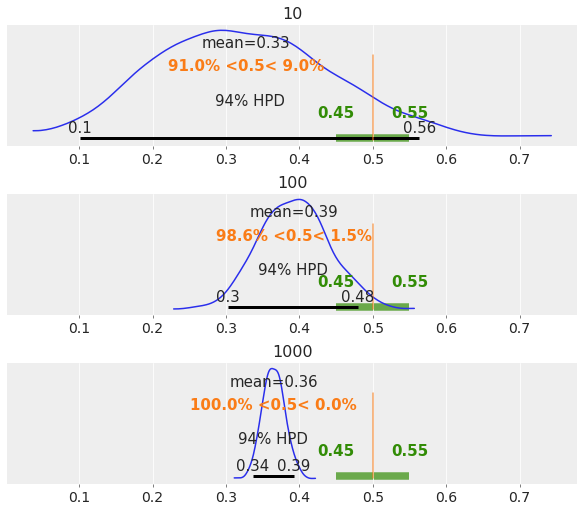

In [12]:
_,ax = plt.subplots(len(trial_counts), 1, sharex=True, sharey=False,
                    figsize=(8, 7), constrained_layout=True)

for trial_index in range(len(trial_counts)):
    trial_count = trial_counts[trial_index]
    print(trial_count)
    data = stats.bernoulli.rvs(p=theta_real, size=trial_count)
    with pm.Model() as our_first_model:
        # a priori - uniform
        θ = pm.Beta('θ', alpha=1., beta=1.)
        # likelihood p(y|θ)
        y = pm.Bernoulli('y', p=θ, observed=data)
        trace = pm.sample(1000, random_seed=123)
        
    df = az.summary(trace)
    print(df)
    ref_value = 0.5
    az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=ref_value, ax = ax[trial_index])
    ax[trial_index].set_title(trial_count)
    
